## Advanced Analytics in Fundraising

### Members: HOBEIKA Rebecca     •     IONASCU Alexandra-Maria     •     LAGO Jenie Marie     •     SEO Yerim

###  1. Data gathering


In [3]:
import pandas as pd
import numpy as np

In [4]:
# Goal: Build a predictive model to select the best candidates for a fundraising campaign.

In [5]:
trainingFileCsv = "selection campaign 6169.csv"
trainingCampaignId = 6169

TestingFileCsv = "selection campaign 7244.csv"
testingCampaignId = 7244

In [6]:
donors = pd.read_csv("donors.csv", sep=";")
print(len(donors))
# Contains socio demographic information on all the donors that made at least one donation via DSC.

44691


In [7]:
donors.head(5)

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24
1,100002,2260.0,Antwerp,Flanders,M,NL,1952-01-14
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,1986-12-23
3,100004,1020.0,Brussels,Brussels,F,FR,1952-03-29
4,100005,1020.0,Brussels,Brussels,F,FR,1986-06-25


In [8]:
campaigns = pd.read_csv("campaigns.csv", sep=";")
print(len(campaigns))

# Contains details of all the campaigns launched by DSC since 2004.

367


In [9]:
campaigns.head(5)

,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [10]:
# ORIGINAL
campaigns.loc[campaigns['campaignID'].isin([trainingCampaignId,testingCampaignId])]

,campaignID,date,lettersSent,CostUnit
335,6169,04/09/2018,34 888,"0,87 €"
354,7244,18/06/2019,25 645,"0,55 €"


In [11]:
# AFTER CONVERSION
campaigns["date"] = pd.to_datetime(campaigns["date"], format='%d/%m/%Y')
campaigns.loc[campaigns['campaignID'].isin([trainingCampaignId,testingCampaignId])]

,campaignID,date,lettersSent,CostUnit
335,6169,2018-09-04,34 888,"0,87 €"
354,7244,2019-06-18,25 645,"0,55 €"


In [12]:
gifts = pd.read_csv("gifts.csv", sep=";")
print(len(gifts))
# Contains a complete history of all donations made over a 20 year period.

216594


In [13]:
gifts

,donorID,campaignID,amount,date
0,100001,NaN,12.39,2004-03-23
1,100001,1577.0,12.39,2007-10-11
2,100001,1634.0,6.69,2007-12-28
3,100001,1778.0,24.79,2008-06-14
4,100001,1808.0,7.44,2008-07-09
...,...,...,...,...
216589,265584,6169.0,300.00,2018-09-23
216590,281770,6169.0,30.00,2018-09-08
216591,317880,6169.0,157.50,2018-09-12
216592,480980,6169.0,36.00,2018-09-12


In [14]:
# Before any changes
gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   donorID     216594 non-null  int64  
 1   campaignID  200957 non-null  float64
 2   amount      216594 non-null  float64
 3   date        216594 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ MB


In [15]:
gifts["campaignID"] = gifts["campaignID"].fillna(0)

# Change the campaignID type from float to integer
#gifts.loc[:,"campaignID"] = gifts.loc[:,"campaignID"].astype(int)
gifts['campaignID'] = gifts['campaignID'].astype('Int64')

In [16]:
gifts["date"] = pd.to_datetime(gifts["date"], format='%Y-%m-%d')

In [17]:
# After format change
gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   donorID     216594 non-null  int64         
 1   campaignID  216594 non-null  Int64         
 2   amount      216594 non-null  float64       
 3   date        216594 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 6.8 MB


In [18]:
gifts

,donorID,campaignID,amount,date
0,100001,0,12.39,2004-03-23
1,100001,1577,12.39,2007-10-11
2,100001,1634,6.69,2007-12-28
3,100001,1778,24.79,2008-06-14
4,100001,1808,7.44,2008-07-09
...,...,...,...,...
216589,265584,6169,300.00,2018-09-23
216590,281770,6169,30.00,2018-09-08
216591,317880,6169,157.50,2018-09-12
216592,480980,6169,36.00,2018-09-12


In [19]:
# Check test campaign in gifts
gifts[gifts['campaignID'] == 7244]

,donorID,campaignID,amount,date
5828,100724,7244,40.0,2019-07-04
7527,100896,7244,10.0,2019-06-28
8314,100964,7244,100.0,2019-06-30
9269,101066,7244,60.0,2019-07-06
9316,101069,7244,80.0,2019-07-06
...,...,...,...,...
214899,144369,7244,6.0,2019-07-01
214914,144371,7244,100.0,2019-07-02
215729,144481,7244,80.0,2019-06-23
215878,144512,7244,20.0,2019-07-07


In [20]:
# Check training campaign in gifts
gifts[gifts['campaignID'] == trainingCampaignId]

,donorID,campaignID,amount,date
132,100023,6169,15.0,2018-09-15
705,100126,6169,123.0,2018-09-11
1151,100253,6169,120.0,2018-09-18
1362,100279,6169,75.0,2018-09-13
1804,100320,6169,135.0,2018-09-09
...,...,...,...,...
216589,265584,6169,300.0,2018-09-23
216590,281770,6169,30.0,2018-09-08
216591,317880,6169,157.5,2018-09-12
216592,480980,6169,36.0,2018-09-12


In [21]:
# Add column for the year date was given
gifts['Year'] = pd.DatetimeIndex(gifts['date']).year
gifts.head()

,donorID,campaignID,amount,date,Year
0,100001,0,12.39,2004-03-23,2004
1,100001,1577,12.39,2007-10-11,2007
2,100001,1634,6.69,2007-12-28,2007
3,100001,1778,24.79,2008-06-14,2008
4,100001,1808,7.44,2008-07-09,2008


In [22]:
gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   donorID     216594 non-null  int64         
 1   campaignID  216594 non-null  Int64         
 2   amount      216594 non-null  float64       
 3   date        216594 non-null  datetime64[ns]
 4   Year        216594 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 8.5 MB


In [23]:
# Check if campaign is sorted by campaign id or not
campaigns[campaigns['campaignID'] <= trainingCampaignId].sort_values(by='campaignID', ascending=False).head()

,campaignID,date,lettersSent,CostUnit
335,6169,2018-09-04,34 888,"0,87 €"
334,6168,2018-08-25,26 787,"0,30 €"
333,5449,2018-08-05,30 991,"0,10 €"
332,5434,2018-07-19,26 255,"0,20 €"
331,5397,2018-07-05,6 457,"0,09 €"


In [24]:
# Use date of the campaign 
campaigns[campaigns['date'] <= '2018-09-04'].sort_values(by='date', ascending=False).head()

# VERDICT: Campaigns seem to be ordered by campaignID

,campaignID,date,lettersSent,CostUnit
335,6169,2018-09-04,34 888,"0,87 €"
334,6168,2018-08-25,26 787,"0,30 €"
333,5449,2018-08-05,30 991,"0,10 €"
332,5434,2018-07-19,26 255,"0,20 €"
331,5397,2018-07-05,6 457,"0,09 €"


In [25]:
# Check if gifts from previous campaigns are received during or after the next campaign
gifts[gifts['campaignID'] == 6168].sort_values(by='date', ascending=False).head()

# VERDICT: YES

,donorID,campaignID,amount,date,Year
157836,124329,6168,41.0,2018-09-14,2018
8726,101002,6168,10.0,2018-09-14,2018
151185,122795,6168,10.0,2018-09-14,2018
147504,122091,6168,50.0,2018-09-14,2018
185509,131710,6168,10.0,2018-09-14,2018


In [26]:
all_gifts = gifts
#gifts = gifts[gifts["date"] <= "2018-09-04"]

In [27]:
gifts_onTrainingCampaign = gifts[gifts['campaignID'] == trainingCampaignId]
print(gifts_onTrainingCampaign["donorID"].count())
gifts_onTrainingCampaign.info()

1191
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 132 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     1191 non-null   int64         
 1   campaignID  1191 non-null   Int64         
 2   amount      1191 non-null   float64       
 3   date        1191 non-null   datetime64[ns]
 4   Year        1191 non-null   int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 57.0 KB


In [28]:
gifts_onTrainingCampaign.sort_values(by='date', ascending=False).head()

,donorID,campaignID,amount,date,Year
147679,122120,6169,75.0,2018-09-24,2018
165556,126206,6169,30.0,2018-09-24,2018
147790,122149,6169,120.0,2018-09-24,2018
91795,111362,6169,60.0,2018-09-24,2018
169723,127236,6169,90.0,2018-09-24,2018


In [29]:
gifts_onTrainingCampaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 132 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     1191 non-null   int64         
 1   campaignID  1191 non-null   Int64         
 2   amount      1191 non-null   float64       
 3   date        1191 non-null   datetime64[ns]
 4   Year        1191 non-null   int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 57.0 KB


In [30]:
gifts_onTestCampaign = gifts[gifts['campaignID'] == testingCampaignId]
print(gifts_onTestCampaign["donorID"].count())
gifts_onTestCampaign.info()

#gifts_testCampaign["donorID"].count()
#gifts_onCampaignDate.head()

361
<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 5828 to 215956
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     361 non-null    int64         
 1   campaignID  361 non-null    Int64         
 2   amount      361 non-null    float64       
 3   date        361 non-null    datetime64[ns]
 4   Year        361 non-null    int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 17.3 KB


In [31]:
gifts_onTestCampaign.head()

,donorID,campaignID,amount,date,Year
5828,100724,7244,40.0,2019-07-04,2019
7527,100896,7244,10.0,2019-06-28,2019
8314,100964,7244,100.0,2019-06-30,2019
9269,101066,7244,60.0,2019-07-06,2019
9316,101069,7244,80.0,2019-07-06,2019


In [32]:
gifts_onTestCampaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 5828 to 215956
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     361 non-null    int64         
 1   campaignID  361 non-null    Int64         
 2   amount      361 non-null    float64       
 3   date        361 non-null    datetime64[ns]
 4   Year        361 non-null    int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 17.3 KB


### Filter data based on timeline

In [33]:
# Use date limit. Use one year for now
gifts_before_trainingcampaign = gifts.loc[(gifts['date'] < '2018-08-04') & (gifts['date'] > '2017-08-04')]
gifts_before_trainingcampaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3304 entries, 14 to 216575
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     3304 non-null   int64         
 1   campaignID  3304 non-null   Int64         
 2   amount      3304 non-null   float64       
 3   date        3304 non-null   datetime64[ns]
 4   Year        3304 non-null   int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 158.1 KB


In [34]:
gifts_before_trainingcampaign.sort_values(by='date', ascending=False).head()

,donorID,campaignID,amount,date,Year
20594,102345,5434,41.0,2018-08-03,2018
17886,101984,5434,40.0,2018-08-03,2018
211059,142064,5434,40.0,2018-08-03,2018
92394,111468,5434,40.0,2018-08-02,2018
38912,104283,5434,41.0,2018-08-02,2018


### Feature engineering

In [35]:
gifts_num_donations = gifts_before_trainingcampaign.groupby('donorID', as_index=False)['campaignID'].count()
gifts_num_donations_df = pd.DataFrame(gifts_num_donations)
gifts_num_donations_df.columns = ["donorID", "Num_Donations_Past_YNear"]
gifts_num_donations_df

,donorID,Num_Donations_Past_YNear
0,100003,4
1,100005,1
2,100006,1
3,100007,1
4,100030,1
...,...,...
2502,144626,1
2503,144657,4
2504,144671,2
2505,144676,1


In [45]:
campaign_6169 = pd.read_csv(trainingFileCsv, sep=";")
print(len(campaign_6169))

34888


In [50]:
print(len(campaign_6169))

34888


In [51]:
print(len(gifts_num_donations_df))

2507


In [61]:
gifts_num_donations_df[['donorID']]

,donorID
0,100001
1,100002
2,100004
3,100008
4,100009
...,...
2502,103056
2503,103057
2504,103058
2505,103060


In [62]:
campaign_6169[['donorID']]

,donorID
0,100001
1,100002
2,100004
3,100008
4,100009
...,...
34883,144686
34884,144687
34885,144689
34886,144690


In [52]:
campaign_6169 = campaign_6169.merge(gifts_num_donations_df, on='donorID', how='left')
print(len(campaign_6169))

34888


In [38]:
gifts_total_amount = gifts_before_trainingcampaign.groupby('donorID', as_index=False)['amount'].sum()
gifts_total_amount_df = pd.DataFrame(gifts_total_amount)
gifts_total_amount_df.columns = ["donorID", "Total_Amount_Donated_Past_Year"]
gifts_total_amount_df
campaign_6169 = campaign_6169.merge(gifts_total_amount_df, on='donorID', how='left')

In [39]:
campaign_6169

,donorID,Num_Donations_Past_YNear,Total_Amount_Donated_Past_Year
0,100001,NaN,NaN
1,100002,NaN,NaN
2,100004,NaN,NaN
3,100008,NaN,NaN
4,100009,NaN,NaN
...,...,...,...
34883,144686,NaN,NaN
34884,144687,NaN,NaN
34885,144689,1.0,100.0
34886,144690,NaN,NaN


In [40]:
# Retain the use of gifts table so we see even super old donations 
# But make sure last one is not beyond the campaign date

#gifts_before_campaign_all = gifts.loc[gifts['date'] < '2018-08-04']
gifts_before_campaign_all = gifts.loc[(gifts['date'] < '2018-08-04') & (gifts['date'] >= '2013-08-04')]
gifts_last_donation = gifts_before_campaign_all.groupby('donorID', as_index=False)['date'].max()
gifts_last_donation_df = pd.DataFrame(gifts_last_donation)
gifts_last_donation_df.columns = ["donorID", "Date_of_last_donation_longterm"]
gifts_last_donation_df
campaign_6169 = campaign_6169.merge(gifts_last_donation_df, on='donorID', how='left')
campaign_6169

,donorID,Num_Donations_Past_YNear,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm
0,100001,NaN,NaN,NaT
1,100002,NaN,NaN,2015-01-10
2,100004,NaN,NaN,NaT
3,100008,NaN,NaN,NaT
4,100009,NaN,NaN,NaT
...,...,...,...,...
34883,144686,NaN,NaN,2015-04-28
34884,144687,NaN,NaN,2015-11-06
34885,144689,1.0,100.0,2018-06-25
34886,144690,NaN,NaN,2014-12-30


In [41]:
avg_donation_per_year = gifts_before_campaign_all.groupby(['donorID'], as_index=False)['amount'].mean()
avg_donation_per_year_df = pd.DataFrame(avg_donation_per_year)
avg_donation_per_year_df.columns = ["donorID","Average_donation_longterm"]
avg_donation_per_year_df

,donorID,Average_donation_longterm
0,100002,20.000000
1,100003,3.600000
2,100005,5.000000
3,100006,5.000000
4,100007,33.333333
...,...,...
20083,144687,10.000000
20084,144688,15.000000
20085,144689,100.000000
20086,144690,40.000000


In [42]:
campaign_6169 = campaign_6169.merge(avg_donation_per_year_df, on='donorID', how='left')
campaign_6169

,donorID,Num_Donations_Past_YNear,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm
0,100001,NaN,NaN,NaT,NaN
1,100002,NaN,NaN,2015-01-10,20.0
2,100004,NaN,NaN,NaT,NaN
3,100008,NaN,NaN,NaT,NaN
4,100009,NaN,NaN,NaT,NaN
...,...,...,...,...,...
34883,144686,NaN,NaN,2015-04-28,50.0
34884,144687,NaN,NaN,2015-11-06,10.0
34885,144689,1.0,100.0,2018-06-25,100.0
34886,144690,NaN,NaN,2014-12-30,40.0


In [43]:
train = campaign_6169.merge(donors, on='donorID', how='left')
train

,donorID,Num_Donations_Past_YNear,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth
0,100001,NaN,NaN,NaT,NaN,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24
1,100002,NaN,NaN,2015-01-10,20.0,2260.0,Antwerp,Flanders,M,NL,1952-01-14
2,100004,NaN,NaN,NaT,NaN,1020.0,Brussels,Brussels,F,FR,1952-03-29
3,100008,NaN,NaN,NaT,NaN,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30
4,100009,NaN,NaN,NaT,NaN,1020.0,Brussels,Brussels,M,FR,1932-01-20
...,...,...,...,...,...,...,...,...,...,...,...
34883,144686,NaN,NaN,2015-04-28,50.0,2440.0,Antwerp,Flanders,F,NL,1964-09-28
34884,144687,NaN,NaN,2015-11-06,10.0,4900.0,Liege,Wallonia,M,FR,1970-09-12
34885,144689,1.0,100.0,2018-06-25,100.0,3061.0,Flemish Brabant,Flanders,M,NL,1967-04-21
34886,144690,NaN,NaN,2014-12-30,40.0,1950.0,Flemish Brabant,Flanders,M,FR,1976-05-07


### Data cleaning

In [46]:
# remove records with no values in donors table (no dsc campaign donors)
def is_dsc(row):
    if pd.isnull(row['region']):
        val = 0
    else:
        val = 1
    return val

In [47]:
train["dsc_donation"] = train.apply(is_dsc, axis=1)

In [48]:
# only people who donated through dsc
dsc_donors = train[train["region"].isna() == False]

In [50]:
# Calculate age during campaign
from datetime import date, timedelta
dsc_donors["dateOfBirth"] = pd.to_datetime(dsc_donors["dateOfBirth"], format='%Y-%m-%d')
dsc_donors['age'] = (pd.to_datetime('2018-09-04', format='%Y-%m-%d') - dsc_donors["dateOfBirth"]) // timedelta(days=365.2425)

<ipython-input-50-18790739809d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsc_donors["dateOfBirth"] = pd.to_datetime(dsc_donors["dateOfBirth"], format='%Y-%m-%d')
<ipython-input-50-18790739809d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsc_donors['age'] = (pd.to_datetime('2018-09-04', format='%Y-%m-%d') - dsc_donors["dateOfBirth"]) // timedelta(days=365.2425)


In [51]:
dsc_donors.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,NaN,NaN,NaT,NaN,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1,50
1,100002,NaN,NaN,2015-01-10,20.0,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1,66
2,100004,NaN,NaN,NaT,NaN,1020.0,Brussels,Brussels,F,FR,1952-03-29,1,66
3,100008,NaN,NaN,NaT,NaN,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,1,81
4,100009,NaN,NaN,NaT,NaN,1020.0,Brussels,Brussels,M,FR,1932-01-20,1,86


In [57]:
dsc_donors[['Num_Donations_Past_Year','Total_Amount_Donated_Past_Year']] = dsc_donors[['Num_Donations_Past_Year','Total_Amount_Donated_Past_Year']].fillna(0)

C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [58]:
dsc_donors

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,0.0,0.0,NaT,NaN,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1,50
1,100002,0.0,0.0,2015-01-10,20.0,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1,66
2,100004,0.0,0.0,NaT,NaN,1020.0,Brussels,Brussels,F,FR,1952-03-29,1,66
3,100008,0.0,0.0,NaT,NaN,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,1,81
4,100009,0.0,0.0,NaT,NaN,1020.0,Brussels,Brussels,M,FR,1932-01-20,1,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,144686,0.0,0.0,2015-04-28,50.0,2440.0,Antwerp,Flanders,F,NL,1964-09-28,1,53
34884,144687,0.0,0.0,2015-11-06,10.0,4900.0,Liege,Wallonia,M,FR,1970-09-12,1,47
34885,144689,1.0,100.0,2018-06-25,100.0,3061.0,Flemish Brabant,Flanders,M,NL,1967-04-21,1,51
34886,144690,0.0,0.0,2014-12-30,40.0,1950.0,Flemish Brabant,Flanders,M,FR,1976-05-07,1,42


In [65]:
# Female:1
# Male: 2
dsc_donors.loc[dsc_donors['gender'] == 'F', 'gender'] = 1
dsc_donors.loc[dsc_donors['gender'] == 'M', 'gender'] = 2

dsc_donors.loc[dsc_donors['language'] == 'NL', 'language'] = 1
dsc_donors.loc[dsc_donors['language'] == 'FR', 'language'] = 2
dsc_donors.loc[dsc_donors['language'] == 'EN', 'language'] = 3

dsc_donors.head()

C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,0.0,0.0,NaT,NaN,1861.0,Flemish Brabant,Flanders,1,1,1967-12-24,1,50
1,100002,0.0,0.0,2015-01-10,20.0,2260.0,Antwerp,Flanders,2,1,1952-01-14,1,66
2,100004,0.0,0.0,NaT,NaN,1020.0,Brussels,Brussels,1,2,1952-03-29,1,66
3,100008,0.0,0.0,NaT,NaN,1780.0,Flemish Brabant,Flanders,2,2,1937-08-30,1,81
4,100009,0.0,0.0,NaT,NaN,1020.0,Brussels,Brussels,2,2,1932-01-20,1,86


In [66]:
def is_dsc(row):
    if pd.isnull(row['region']):
        val = 0
    else:
        val = 1
    return val
train["dsc_donation"] = train.apply(is_dsc, axis=1)

In [68]:
campaign_6169_date = pd.to_datetime('2018-08-04')
campaign_6169_date

Timestamp('2018-08-04 00:00:00')

In [69]:
# Get recency
dsc_donors['Recency'] = (campaign_6169_date - dsc_donors['Date_of_last_donation_longterm']) // timedelta(days=1)

<ipython-input-69-dbcd28cd86cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsc_donors['Recency'] = (campaign_6169_date - dsc_donors['Date_of_last_donation_longterm']) // timedelta(days=1)


In [71]:
dsc_donors_final = dsc_donors.merge(gifts_onTrainingCampaign, how="left", on="donorID")


In [72]:
dsc_donors_final['province'].value_counts()

Antwerp            8341
East Flanders      7326
West Flanders      7090
Flemish Brabant    5364
Limburg            3886
Brussels           1055
Liege               568
Hainaut             554
Walloon Brabant     278
Namur               229
Luxembourg          181
Missing               2
Name: province, dtype: int64

In [73]:
dsc_donors_final = dsc_donors_final.drop(columns=['amount', 'date', 'Year'])
dsc_donors_final['campaignID'] = dsc_donors_final['campaignID'].fillna(0)


In [75]:
dsc_donors_final['campaignID'] = dsc_donors_final['campaignID'].replace(6169, 1)
dsc_donors_final['campaignID'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [76]:
dsc_donors_final = dsc_donors_final.rename(columns={'campaignID':'Target'})
dsc_donors_final

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age,Recency,Target
0,100001,0.0,0.0,NaT,NaN,1861.0,Flemish Brabant,Flanders,1,1,1967-12-24,1,50,NaN,0
1,100002,0.0,0.0,2015-01-10,20.0,2260.0,Antwerp,Flanders,2,1,1952-01-14,1,66,1302.0,0
2,100004,0.0,0.0,NaT,NaN,1020.0,Brussels,Brussels,1,2,1952-03-29,1,66,NaN,0
3,100008,0.0,0.0,NaT,NaN,1780.0,Flemish Brabant,Flanders,2,2,1937-08-30,1,81,NaN,0
4,100009,0.0,0.0,NaT,NaN,1020.0,Brussels,Brussels,2,2,1932-01-20,1,86,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,144686,0.0,0.0,2015-04-28,50.0,2440.0,Antwerp,Flanders,1,1,1964-09-28,1,53,1194.0,0
34870,144687,0.0,0.0,2015-11-06,10.0,4900.0,Liege,Wallonia,2,2,1970-09-12,1,47,1002.0,0
34871,144689,1.0,100.0,2018-06-25,100.0,3061.0,Flemish Brabant,Flanders,2,1,1967-04-21,1,51,40.0,0
34872,144690,0.0,0.0,2014-12-30,40.0,1950.0,Flemish Brabant,Flanders,2,2,1976-05-07,1,42,1313.0,0


In [77]:
dsc_donors_final = dsc_donors_final.drop(columns=['Date_of_last_donation_longterm','dateOfBirth','dsc_donation'])
dsc_donors_final

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,province,region,gender,language,age,Recency,Target
0,100001,0.0,0.0,NaN,1861.0,Flemish Brabant,Flanders,1,1,50,NaN,0
1,100002,0.0,0.0,20.0,2260.0,Antwerp,Flanders,2,1,66,1302.0,0
2,100004,0.0,0.0,NaN,1020.0,Brussels,Brussels,1,2,66,NaN,0
3,100008,0.0,0.0,NaN,1780.0,Flemish Brabant,Flanders,2,2,81,NaN,0
4,100009,0.0,0.0,NaN,1020.0,Brussels,Brussels,2,2,86,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34869,144686,0.0,0.0,50.0,2440.0,Antwerp,Flanders,1,1,53,1194.0,0
34870,144687,0.0,0.0,10.0,4900.0,Liege,Wallonia,2,2,47,1002.0,0
34871,144689,1.0,100.0,100.0,3061.0,Flemish Brabant,Flanders,2,1,51,40.0,0
34872,144690,0.0,0.0,40.0,1950.0,Flemish Brabant,Flanders,2,2,42,1313.0,0


In [78]:
# add here gender preprocessing, language
# Female:1
# Male: 2
dsc_donors_final.loc[dsc_donors_final['gender'] == 'F', 'gender'] = 1
dsc_donors_final.loc[dsc_donors_final['gender'] == 'M', 'gender'] = 2

dsc_donors_final.loc[dsc_donors_final['language'] == 'NL', 'language'] = 1
dsc_donors_final.loc[dsc_donors_final['language'] == 'FR', 'language'] = 2
dsc_donors_final.loc[dsc_donors_final['language'] == 'EN', 'language'] = 3

dsc_donors_final.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,province,region,gender,language,age,Recency,Target
0,100001,0.0,0.0,NaN,1861.0,Flemish Brabant,Flanders,1,1,50,NaN,0
1,100002,0.0,0.0,20.0,2260.0,Antwerp,Flanders,2,1,66,1302.0,0
2,100004,0.0,0.0,NaN,1020.0,Brussels,Brussels,1,2,66,NaN,0
3,100008,0.0,0.0,NaN,1780.0,Flemish Brabant,Flanders,2,2,81,NaN,0
4,100009,0.0,0.0,NaN,1020.0,Brussels,Brussels,2,2,86,NaN,0


In [79]:
dsc_donors_final['province'].value_counts()

Antwerp            8341
East Flanders      7326
West Flanders      7090
Flemish Brabant    5364
Limburg            3886
Brussels           1055
Liege               568
Hainaut             554
Walloon Brabant     278
Namur               229
Luxembourg          181
Missing               2
Name: province, dtype: int64

In [80]:
# one hot - province	region
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
transfomred = enc.fit_transform(dsc_donors_final[['province', 'region']])
df = pd.DataFrame(transfomred.toarray(), )
df.columns = enc.get_feature_names()
df

,x0_Antwerp,x0_Brussels,x0_East Flanders,x0_Flemish Brabant,x0_Hainaut,x0_Liege,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34870,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34871,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
dsc_donors_final_enc = dsc_donors_final.join(df)


In [82]:
dsc_donors_final_enc = dsc_donors_final_enc.drop(columns =['province', 'region'])
dsc_donors_final_enc

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,Target,...,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,100001,0.0,0.0,NaN,1861.0,1,1,50,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100002,0.0,0.0,20.0,2260.0,2,1,66,1302.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100004,0.0,0.0,NaN,1020.0,1,2,66,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,100008,0.0,0.0,NaN,1780.0,2,2,81,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,100009,0.0,0.0,NaN,1020.0,2,2,86,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,144686,0.0,0.0,50.0,2440.0,1,1,53,1194.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34870,144687,0.0,0.0,10.0,4900.0,2,2,47,1002.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34871,144689,1.0,100.0,100.0,3061.0,2,1,51,40.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34872,144690,0.0,0.0,40.0,1950.0,2,2,42,1313.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [83]:
enc.categories_

[array(['Antwerp', 'Brussels', 'East Flanders', 'Flemish Brabant',
        'Hainaut', 'Liege', 'Limburg', 'Luxembourg', 'Missing', 'Namur',
        'Walloon Brabant', 'West Flanders'], dtype=object),
 array(['Brussels', 'Flanders', 'Missing', 'Wallonia'], dtype=object)]

In [84]:
gender_mode = dsc_donors_final_enc['gender'].mode()[0]
dsc_donors_final_enc['gender'] = dsc_donors_final_enc['gender'].fillna(gender_mode)

In [85]:
gender_mode = dsc_donors_final_enc['gender'].mode()[0]
dsc_donors_final_enc['gender'] = dsc_donors_final_enc['gender'].fillna(gender_mode)

In [86]:
zipcode_mode = dsc_donors_final_enc['zipcode'].mode()[0]
dsc_donors_final_enc['zipcode'] = dsc_donors_final_enc['zipcode'].fillna(zipcode_mode)

In [87]:

dsc_donors_final_enc = dsc_donors_final_enc[dsc_donors_final_enc['age'] <= 100]
dsc_donors_final_enc

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,Target,...,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,100001,0.0,0.0,NaN,1861.0,1,1,50,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100002,0.0,0.0,20.0,2260.0,2,1,66,1302.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100004,0.0,0.0,NaN,1020.0,1,2,66,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,100008,0.0,0.0,NaN,1780.0,2,2,81,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,100009,0.0,0.0,NaN,1020.0,2,2,86,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,144686,0.0,0.0,50.0,2440.0,1,1,53,1194.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34870,144687,0.0,0.0,10.0,4900.0,2,2,47,1002.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34871,144689,1.0,100.0,100.0,3061.0,2,1,51,40.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34872,144690,0.0,0.0,40.0,1950.0,2,2,42,1313.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [88]:
dsc_donors_final_enc['Average_donation_longterm'] = dsc_donors_final_enc['Average_donation_longterm'].fillna(0)
dsc_donors_final_enc['Recency'] = dsc_donors_final_enc['Recency'].fillna(0)


<ipython-input-88-c6f982f0cc0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsc_donors_final_enc['Average_donation_longterm'] = dsc_donors_final_enc['Average_donation_longterm'].fillna(0)
<ipython-input-88-c6f982f0cc0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsc_donors_final_enc['Recency'] = dsc_donors_final_enc['Recency'].fillna(0)


## Split data and perform oversampling



In [90]:
# get features and label
train_features = dsc_donors_final_enc.drop(columns=['Target', 'donorID'])
train_label = dsc_donors_final_enc['Target']

In [91]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\alexa\anaconda3\lib\site-packages (0.7.0)Note: you may need to restart the kernel to use updated packages.



In [92]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 101)
X, y = oversample.fit_resample(train_features, train_label.astype(int))

In [93]:
train_label = y

In [94]:
train_features = pd.DataFrame(X, columns = train_features.columns)
train_features

,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,x0_Brussels,...,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,0.0,0.0,0.0,1861.000000,1,1,50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,20.0,2260.000000,2,1,66,1302.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1020.000000,1,2,66,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1780.000000,2,2,81,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1020.000000,2,2,86,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67387,0.0,0.0,0.0,3965.816640,1,1,62,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67388,0.0,0.0,0.0,9305.098085,1,1,70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67389,0.0,0.0,0.0,1795.780667,1,1,62,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67390,0.0,0.0,0.0,2800.000000,1,1,40,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [95]:
dsc_donors_final_enc['Target'].value_counts()

0    33696
1     1177
Name: Target, dtype: Int64

In [96]:
from sklearn.model_selection import train_test_split
# X_train = train features
# X_test = test/validation features
# y_train = train labels
# y_test = test/validation labels

X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.2, random_state=42)

In [97]:
y_train

17869    1
512      0
33830    0
63930    1
49070    1
        ..
37194    1
6265     0
54886    1
860      0
15795    0
Name: Target, Length: 53913, dtype: int32

### Define models and train data 

In [98]:
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier

tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 70000)
randomForest = RandomForestClassifier(n_estimators = 150)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

In [99]:
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
#           "svm"          :svm,
#           "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }

In [100]:
y_train = y_train.astype('int')

DecisionTreeClassifier()
tree has been trained successfully
[1.58316526e-02 6.27674490e-03 1.86528484e-01 3.15234396e-01
 2.67403795e-01 1.21410441e-02 1.40254524e-01 3.56498647e-02
 4.98002046e-03 1.43132074e-04 8.87505275e-04 2.97430647e-03
 1.02304950e-03 9.65631048e-04 3.04642026e-03 3.72308564e-04
 4.24738778e-04 6.77624151e-04 3.53466130e-04 2.56238328e-03
 3.72680157e-04 1.40646334e-03 3.64385246e-04 1.25379930e-04]


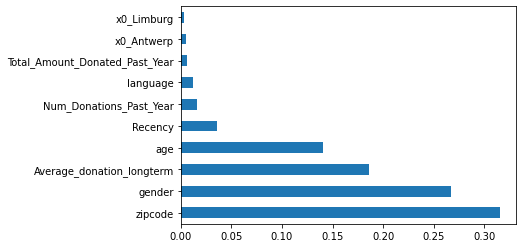

LogisticRegression(max_iter=70000)
logistic has been trained successfully
feature_importances_ not an attribute
RandomForestClassifier(n_estimators=150)
randomForest has been trained successfully
[9.20806342e-03 9.72601326e-03 1.06670666e-01 3.60400786e-01
 2.38853115e-01 1.55820452e-02 1.57789154e-01 7.10854030e-02
 4.90332980e-03 8.97244444e-04 2.79234959e-03 4.29059680e-03
 2.44070746e-03 1.02953464e-03 3.00554518e-03 1.26863232e-03
 2.39955111e-04 7.95592960e-04 1.46768754e-03 2.66330501e-03
 8.01890090e-04 2.33104981e-03 1.63852416e-04 1.59348136e-03]


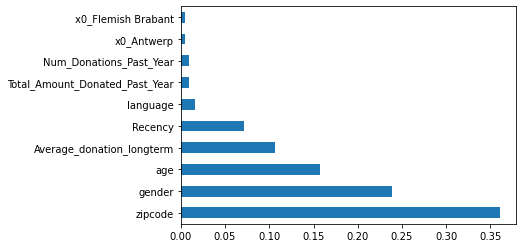

GradientBoostingClassifier()
boostedTree has been trained successfully
[2.17716743e-02 2.64710370e-02 2.30561003e-01 1.65453805e-02
 5.70479149e-01 1.77392124e-02 9.34071895e-02 5.95468088e-03
 6.55402480e-03 0.00000000e+00 8.01911161e-04 1.18033350e-03
 1.56459687e-03 3.39800604e-04 2.45913670e-03 0.00000000e+00
 4.20033511e-04 2.71796887e-05 1.05694158e-03 7.87482706e-04
 0.00000000e+00 1.57275162e-03 3.06480009e-04 0.00000000e+00]


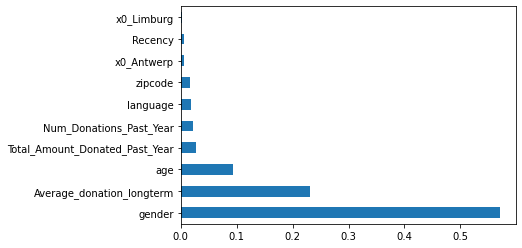

KNeighborsClassifier()
neighbors has been trained successfully
feature_importances_ not an attribute


In [102]:
import matplotlib.pyplot as plt

for model in models:
    print(models[model])
    models[model].fit(X_train,np.array(y_train))
    print(f"{model} has been trained successfully")
    try:
        print(models[model].feature_importances_)
        feat_importances = pd.Series(models[model].feature_importances_, index=X_train.columns)
        feat_importances.nlargest(10).plot(kind='barh')
        plt.show()
    except AttributeError:
        print("feature_importances_ not an attribute")    

In [103]:
y_test = np.array(y_test).astype('int')

In [104]:
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score

performances = {}

for model in models:
    predictions   = models[model].predict(X_test)
    probabilities = pd.DataFrame(models[model].predict_proba(X_test))[1]

    accuracy      = accuracy_score(y_test,predictions)
    auc           = roc_auc_score(y_test,np.array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}

In [105]:
pd.DataFrame(performances)

,tree,logistic,randomForest,boostedTree,neighbors
Accuracy,0.903850,0.749536,0.897767,0.810075,0.846799
AUC,0.916588,0.806614,0.956897,0.888650,0.919909


#### Ieseg lib


In [110]:
from pandas             import DataFrame
from pandas             import Series
from pandas             import read_csv
from numpy              import array
from numpy              import random
from sklearn.metrics    import roc_curve

def roc (dataSet: DataFrame, actuals: str, probability: str) -> DataFrame:

    (fpr,tpr,threshold) = roc_curve(array(dataSet[actuals]), array(dataSet[probability]), pos_label = 1)

    returnData = DataFrame(tpr)
    returnData.columns = ["True positive rate"]
    returnData["False positive rate"] = DataFrame(fpr)

    return returnData

def lift (dataSet: DataFrame, actuals: str, probability: str, precision: int = 20) -> DataFrame:

    summary = cumulativeResponse(dataSet = dataSet, actuals = actuals, probability = probability, precision = precision)

    summary["Lift"] = summary["Cumulative response"] / Series(summary["Average response"]).max()
    summary["Base"] = summary["Average response"] / Series(summary["Average response"]).max()

    return summary[["Quantile","Lift","Base"]]

def cumulativeResponse (dataSet: DataFrame, actuals: str, probability: str, precision: int = 20) -> DataFrame:

    internalSet = equifrequentBinning (dataSet = dataSet[[actuals, probability]], byColumn = probability, into = precision)

    internalSet["Quantile"] = internalSet[probability + "_bin"] / precision
    internalSet["obs"]      = 1

    summary = internalSet[["Quantile", actuals, "obs"]].groupby(["Quantile"], as_index = False).sum().sort_values(by = "Quantile", ascending = False)

    summary["cumulativeTarget"]     = Series(summary[actuals]).cumsum(skipna = False)
    summary["cumulativeAll"]        = Series(summary["obs"]).cumsum(skipna = False)
    summary["Cumulative response"]  = summary["cumulativeTarget"] / summary["cumulativeAll"]
    summary["Average response"]     = Series(summary["cumulativeTarget"]).max() / Series(summary["cumulativeAll"]).max()

    return summary[["Quantile","Cumulative response","Average response"]]

def cumulativeGains (dataSet: DataFrame, actuals: str, probability: str, precision: int = 20) -> DataFrame:

    internalSet = equifrequentBinning (dataSet = dataSet[[actuals, probability]], byColumn = probability, into = precision)

    internalSet["Quantile"] = internalSet[probability + "_bin"] / precision
    internalSet["obs"]      = 1

    summary = internalSet[["Quantile", actuals, "obs"]].groupby(["Quantile"], as_index = False).sum().sort_values(by = "Quantile", ascending = False)

    summary["cumulativeTarget"]     = Series(summary[actuals]).cumsum(skipna = False)
    summary["cumulativeAll"]        = Series(summary["obs"]).cumsum(skipna = False)
    summary["Cumulative gains"]     = summary["cumulativeTarget"] / Series(summary["cumulativeTarget"]).max()
    summary["Base"]                 = summary["Quantile"]

    return summary[["Quantile","Cumulative gains","Base"]]

def equifrequentBinning (dataSet: DataFrame, byColumn: str, into: int) -> DataFrame:

    internalSet = dataSet

    quanitles = []

    for i in range(into):
        quanitles.append(1 / into * (i))

    quantile = internalSet.quantile(quanitles, axis = 0)[byColumn].to_dict()

    internalSet["Bin"] = 0

    for q in quantile:
        upperBound = quantile[q]
        internalSet.loc[internalSet[byColumn] >= upperBound, byColumn + "_bin"] = int(q * into +1)

    return internalSet

def partition (dataFrame : DataFrame, splitStrategy: [float]) -> [DataFrame]:

    def assignPartition (toDataFrame: DataFrame, lowerBound: float, upperBound: float, index: int) -> int:
        if toDataFrame["random"] >= lowerBound * observations and toDataFrame["random"] < upperBound * observations:
            return index
        else:
            return int(toDataFrame["Split"])

    if type(splitStrategy) != list:
        raise KeyError("Split strategy must be an array of floating point values.")
    elif sum(splitStrategy) != 1:
        raise ValueError("Split strategy must sum to 1.")
    else:
        observations = dataFrame.shape[0]
        partitions   = len(splitStrategy)

        cumulativeSplit = 0

        data = dataFrame.copy()
        data["random"] = random.permutation(observations)
        data["Split"]  = 0

    for index, split in enumerate(splitStrategy):
        lowerSplit = cumulativeSplit
        upperSplit = cumulativeSplit + split + 1
        cumulativeSplit += split
        data["Split"] = data.apply(lambda x: assignPartition(x,lowerSplit,upperSplit,index+1), axis = 1)

    partitions = []

    for i in range(len(splitStrategy)):
        partitions.append(data.loc[data["Split"] == i+1].drop(["Split","random"], axis = 1).reset_index(drop = True))

    return partitions


In [113]:
lifts     = {}
responses = {}
gains     = {}
data      = pd.DataFrame(y_test).copy() 

for col in data.columns: 
    data = data.rename(columns={col: "target"})
        
for (index,model) in enumerate(models):
    data[f"proba {model}"] = pd.DataFrame(models[model].predict_proba(X_test))[1]
    lifts[model] = lift(dataSet = data, actuals = "target", probability = "proba "+str(model))
    responses[model] = cumulativeResponse(dataSet = data, actuals = "target", probability = "proba "+str(model))
    gains[model] = cumulativeGains(dataSet = data, actuals = "target", probability = "proba "+str(model))

<ipython-input-110-0d6a69417fb5>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Bin"] = 0
<ipython-input-110-0d6a69417fb5>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Bin"] = 0
<ipython-input-110-0d6a69417fb5>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [114]:
data.head(5)

,target,proba tree,proba logistic,proba randomForest,proba boostedTree,proba neighbors
0,0,0.0,0.889383,0.226667,0.247598,0.0
1,1,1.0,0.743369,0.900000,0.738459,0.8
2,1,1.0,0.100575,0.966667,0.562265,1.0
3,0,0.0,0.890606,0.240000,0.356038,0.0
4,1,1.0,0.149950,0.946667,0.465311,1.0


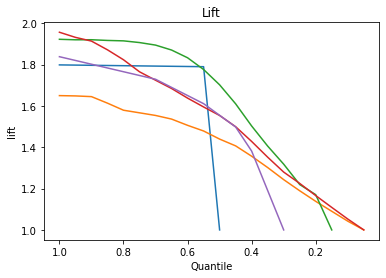

In [115]:
from matplotlib             import pyplot

for model in models:
    pyplot.plot(lifts[model]["Quantile"], lifts[model]["Lift"])
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("lift")
    pyplot.title("Lift")

In [116]:
lifts["boostedTree"].head(10)

,Quantile,Lift,Base
19,1.00,1.956362,1.0
18,0.95,1.931580,1.0
17,0.90,1.913519,1.0
16,0.85,1.871296,1.0
15,0.80,1.823197,1.0
14,0.75,1.764982,1.0
13,0.70,1.724257,1.0
12,0.65,1.684220,1.0
11,0.60,1.637645,1.0
10,0.55,1.594914,1.0


In [117]:
lifts["randomForest"].head(10)

,Quantile,Lift,Base
17,1.00,1.922257,1.0
16,0.95,1.919846,1.0
15,0.90,1.920145,1.0
14,0.85,1.916729,1.0
13,0.80,1.914664,1.0
12,0.75,1.906448,1.0
11,0.70,1.894192,1.0
10,0.65,1.870295,1.0
9,0.60,1.832856,1.0
8,0.55,1.776065,1.0


In [118]:
lifts["neighbors"].head(10)

,Quantile,Lift,Base
5,1.00,1.838044,1.0
4,0.70,1.728937,1.0
3,0.55,1.610845,1.0
2,0.45,1.498072,1.0
1,0.40,1.381331,1.0
0,0.30,1.000000,1.0


## Test Set Creation

In [119]:
campaign_test = pd.read_csv(TestingFileCsv, sep=";")
print(len(campaign_test))

25645


In [120]:
# Use date limit. Use one year for now
gifts_before_testingcampaign = gifts.loc[(gifts['date'] < '2019-05-18') & (gifts['date'] > '2018-05-18')]
gifts_before_testingcampaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7447 entries, 16 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     7447 non-null   int64         
 1   campaignID  7447 non-null   Int64         
 2   amount      7447 non-null   float64       
 3   date        7447 non-null   datetime64[ns]
 4   Year        7447 non-null   int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 356.4 KB


In [121]:
gifts_before_testingcampaign.head()

,donorID,campaignID,amount,date,Year
16,100003,5326,4.0,2018-06-15,2018
17,100003,5359,3.0,2018-07-08,2018
18,100003,6168,4.0,2018-09-04,2018
19,100003,6922,4.0,2018-10-23,2018
20,100003,7037,4.0,2019-01-24,2019


In [122]:
gifts_num_donations_testing = gifts_before_testingcampaign.groupby('donorID', as_index=False)['campaignID'].count()
gifts_num_donations_testing_df = pd.DataFrame(gifts_num_donations_testing)
gifts_num_donations_testing_df.columns = ["donorID", "Num_Donations_Past_Year"]
gifts_num_donations_testing_df

,donorID,Num_Donations_Past_Year
0,100003,8
1,100005,2
2,100023,2
3,100027,1
4,100033,1
...,...,...
4353,265584,1
4354,281770,1
4355,317880,1
4356,480980,1


In [123]:
campaign_test = campaign_test.merge(gifts_num_donations_testing_df, on='donorID', how='left')
campaign_test

,donorID,Num_Donations_Past_Year
0,100001,NaN
1,100002,NaN
2,100008,NaN
3,100009,NaN
4,100010,NaN
...,...,...
25640,144682,NaN
25641,144683,NaN
25642,144686,NaN
25643,144690,NaN


In [124]:
gifts_total_amount_test = gifts_before_testingcampaign.groupby('donorID', as_index=False)['amount'].sum()
gifts_total_amount_test_df = pd.DataFrame(gifts_total_amount_test)
gifts_total_amount_test_df.columns = ["donorID", "Total_Amount_Donated_Past_Year"]
gifts_total_amount_test_df

,donorID,Total_Amount_Donated_Past_Year
0,100003,31.0
1,100005,15.0
2,100023,21.5
3,100027,6.0
4,100033,45.0
...,...,...
4353,265584,300.0
4354,281770,30.0
4355,317880,157.5
4356,480980,36.0


In [125]:
campaign_test = campaign_test.merge(gifts_total_amount_test_df, on='donorID', how='left')
campaign_test.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year
0,100001,NaN,NaN
1,100002,NaN,NaN
2,100008,NaN,NaN
3,100009,NaN,NaN
4,100010,NaN,NaN


In [126]:
gifts_before_testcampaign_all = gifts.loc[(gifts['date'] < '2019-05-18') & (gifts['date'] >= '2014-05-18')]
gifts_last_donation_test = gifts_before_testcampaign_all.groupby('donorID', as_index=False)['date'].max()
gifts_last_donation_test_df = pd.DataFrame(gifts_last_donation_test)
gifts_last_donation_test_df.columns = ["donorID", "Date_of_last_donation_longterm"]
gifts_last_donation_test_df


,donorID,Date_of_last_donation_longterm
0,100002,2015-01-10
1,100003,2019-05-06
2,100005,2019-04-18
3,100006,2017-08-15
4,100007,2017-11-30
...,...,...
19297,265584,2018-09-23
19298,281770,2018-09-08
19299,317880,2018-09-12
19300,480980,2018-09-12


In [127]:
campaign_test = campaign_test.merge(gifts_last_donation_df, on='donorID', how='left')
campaign_test

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm
0,100001,NaN,NaN,NaT
1,100002,NaN,NaN,2015-01-10
2,100008,NaN,NaN,NaT
3,100009,NaN,NaN,NaT
4,100010,NaN,NaN,2015-01-13
...,...,...,...,...
25640,144682,NaN,NaN,2016-08-10
25641,144683,NaN,NaN,2015-10-11
25642,144686,NaN,NaN,2015-04-28
25643,144690,NaN,NaN,2014-12-30


In [128]:
avg_donation_per_year = gifts_before_testcampaign_all.groupby(['donorID'], as_index=False)['amount'].mean()
avg_donation_per_year_df = pd.DataFrame(avg_donation_per_year)
avg_donation_per_year_df.columns = ["donorID","Average_donation_longterm"]
avg_donation_per_year_df

,donorID,Average_donation_longterm
0,100002,20.000000
1,100003,3.818182
2,100005,6.666667
3,100006,5.000000
4,100007,35.000000
...,...,...
19297,265584,300.000000
19298,281770,30.000000
19299,317880,157.500000
19300,480980,36.000000


In [129]:
campaign_test = campaign_test.merge(avg_donation_per_year_df, on='donorID', how='left')
campaign_test

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm
0,100001,NaN,NaN,NaT,NaN
1,100002,NaN,NaN,2015-01-10,20.0
2,100008,NaN,NaN,NaT,NaN
3,100009,NaN,NaN,NaT,NaN
4,100010,NaN,NaN,2015-01-13,40.0
...,...,...,...,...,...
25640,144682,NaN,NaN,2016-08-10,40.0
25641,144683,NaN,NaN,2015-10-11,50.0
25642,144686,NaN,NaN,2015-04-28,50.0
25643,144690,NaN,NaN,2014-12-30,40.0


In [130]:
test_set = campaign_test.merge(donors, on='donorID', how='left')
test_set

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth
0,100001,NaN,NaN,NaT,NaN,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24
1,100002,NaN,NaN,2015-01-10,20.0,2260.0,Antwerp,Flanders,M,NL,1952-01-14
2,100008,NaN,NaN,NaT,NaN,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30
3,100009,NaN,NaN,NaT,NaN,1020.0,Brussels,Brussels,M,FR,1932-01-20
4,100010,NaN,NaN,2015-01-13,40.0,1020.0,Brussels,Brussels,M,FR,1983-05-30
...,...,...,...,...,...,...,...,...,...,...,...
25640,144682,NaN,NaN,2016-08-10,40.0,1640.0,Flemish Brabant,Flanders,M,FR,1982-08-29
25641,144683,NaN,NaN,2015-10-11,50.0,9308.0,East Flanders,Flanders,NaN,NL,1985-06-15
25642,144686,NaN,NaN,2015-04-28,50.0,2440.0,Antwerp,Flanders,F,NL,1964-09-28
25643,144690,NaN,NaN,2014-12-30,40.0,1950.0,Flemish Brabant,Flanders,M,FR,1976-05-07


In [131]:
test_set["dsc_donation"] = test_set.apply(is_dsc, axis=1)

In [132]:
# only people who donated through dsc
dsc_donors_test = test_set[test_set["region"].isna() == False]

In [133]:
dsc_donors_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25645 entries, 0 to 25644
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   donorID                         25645 non-null  int64         
 1   Num_Donations_Past_Year         183 non-null    float64       
 2   Total_Amount_Donated_Past_Year  183 non-null    float64       
 3   Date_of_last_donation_longterm  10488 non-null  datetime64[ns]
 4   Average_donation_longterm       9033 non-null   float64       
 5   zipcode                         25644 non-null  float64       
 6   province                        25645 non-null  object        
 7   region                          25645 non-null  object        
 8   gender                          25634 non-null  object        
 9   language                        25645 non-null  object        
 10  dateOfBirth                     25645 non-null  object        
 11  ds

In [134]:
# Calculate age during campaign
dsc_donors_test["dateOfBirth"] = pd.to_datetime(dsc_donors_test["dateOfBirth"], format='%Y-%m-%d')
dsc_donors_test['age'] = (pd.to_datetime('2019-06-18', format='%Y-%m-%d') - dsc_donors_test["dateOfBirth"]) // timedelta(days=365.2425)

In [135]:
dsc_donors_test.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,NaN,NaN,NaT,NaN,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1,51
1,100002,NaN,NaN,2015-01-10,20.0,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1,67
2,100008,NaN,NaN,NaT,NaN,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,1,81
3,100009,NaN,NaN,NaT,NaN,1020.0,Brussels,Brussels,M,FR,1932-01-20,1,87
4,100010,NaN,NaN,2015-01-13,40.0,1020.0,Brussels,Brussels,M,FR,1983-05-30,1,36


In [136]:
dsc_donors_test[['Num_Donations_Past_Year','Total_Amount_Donated_Past_Year']] = dsc_donors_test[['Num_Donations_Past_Year','Total_Amount_Donated_Past_Year']].fillna(0)

In [137]:
dsc_donors_test.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,0.0,0.0,NaT,NaN,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1,51
1,100002,0.0,0.0,2015-01-10,20.0,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1,67
2,100008,0.0,0.0,NaT,NaN,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,1,81
3,100009,0.0,0.0,NaT,NaN,1020.0,Brussels,Brussels,M,FR,1932-01-20,1,87
4,100010,0.0,0.0,2015-01-13,40.0,1020.0,Brussels,Brussels,M,FR,1983-05-30,1,36


In [138]:
dsc_donors_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25645 entries, 0 to 25644
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   donorID                         25645 non-null  int64         
 1   Num_Donations_Past_Year         25645 non-null  float64       
 2   Total_Amount_Donated_Past_Year  25645 non-null  float64       
 3   Date_of_last_donation_longterm  10488 non-null  datetime64[ns]
 4   Average_donation_longterm       9033 non-null   float64       
 5   zipcode                         25644 non-null  float64       
 6   province                        25645 non-null  object        
 7   region                          25645 non-null  object        
 8   gender                          25634 non-null  object        
 9   language                        25645 non-null  object        
 10  dateOfBirth                     25645 non-null  datetime64[ns]
 11  ds

In [139]:
print(dsc_donors_test['gender'].unique())
print(dsc_donors_test['language'].unique())

['F' 'M' nan]
['NL' 'FR' 'EN']


In [140]:
# Female:1
# Male: 2
dsc_donors_test.loc[dsc_donors_test['gender'] == 'F', 'gender'] = 1
dsc_donors_test.loc[dsc_donors_test['gender'] == 'M', 'gender'] = 2

dsc_donors_test.loc[dsc_donors_test['language'] == 'NL', 'language'] = 1
dsc_donors_test.loc[dsc_donors_test['language'] == 'FR', 'language'] = 2
dsc_donors_test.loc[dsc_donors_test['language'] == 'EN', 'language'] = 3

dsc_donors_test.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,0.0,0.0,NaT,NaN,1861.0,Flemish Brabant,Flanders,1,1,1967-12-24,1,51
1,100002,0.0,0.0,2015-01-10,20.0,2260.0,Antwerp,Flanders,2,1,1952-01-14,1,67
2,100008,0.0,0.0,NaT,NaN,1780.0,Flemish Brabant,Flanders,2,2,1937-08-30,1,81
3,100009,0.0,0.0,NaT,NaN,1020.0,Brussels,Brussels,2,2,1932-01-20,1,87
4,100010,0.0,0.0,2015-01-13,40.0,1020.0,Brussels,Brussels,2,2,1983-05-30,1,36


In [141]:
campaign_test_date = pd.to_datetime('2019-05-18')
campaign_test_date

Timestamp('2019-05-18 00:00:00')

In [142]:
# Get recency
dsc_donors_test['Recency'] = (campaign_test_date - dsc_donors_test['Date_of_last_donation_longterm']) // timedelta(days=1)

In [143]:
dsc_donors_test.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age,Recency
0,100001,0.0,0.0,NaT,NaN,1861.0,Flemish Brabant,Flanders,1,1,1967-12-24,1,51,NaN
1,100002,0.0,0.0,2015-01-10,20.0,2260.0,Antwerp,Flanders,2,1,1952-01-14,1,67,1589.0
2,100008,0.0,0.0,NaT,NaN,1780.0,Flemish Brabant,Flanders,2,2,1937-08-30,1,81,NaN
3,100009,0.0,0.0,NaT,NaN,1020.0,Brussels,Brussels,2,2,1932-01-20,1,87,NaN
4,100010,0.0,0.0,2015-01-13,40.0,1020.0,Brussels,Brussels,2,2,1983-05-30,1,36,1586.0


In [144]:
dsc_donors_test_final = dsc_donors_test.merge(gifts_onTestCampaign, how="left", on="donorID")

In [145]:
dsc_donors_test_final['campaignID'] = dsc_donors_test_final['campaignID'].replace(7244, 1)


In [146]:
dsc_donors_test_final = dsc_donors_test_final.drop(columns=['amount', 'date', 'Year'])
dsc_donors_test_final['campaignID'] = dsc_donors_test_final['campaignID'].fillna(0)


In [147]:
dsc_donors_test_final['campaignID'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [148]:
dsc_donors_test_final = dsc_donors_test_final.rename(columns={'campaignID':'Target'})

dsc_donors_test_final

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age,Recency,Target
0,100001,0.0,0.0,NaT,NaN,1861.0,Flemish Brabant,Flanders,1,1,1967-12-24,1,51,NaN,0
1,100002,0.0,0.0,2015-01-10,20.0,2260.0,Antwerp,Flanders,2,1,1952-01-14,1,67,1589.0,0
2,100008,0.0,0.0,NaT,NaN,1780.0,Flemish Brabant,Flanders,2,2,1937-08-30,1,81,NaN,0
3,100009,0.0,0.0,NaT,NaN,1020.0,Brussels,Brussels,2,2,1932-01-20,1,87,NaN,0
4,100010,0.0,0.0,2015-01-13,40.0,1020.0,Brussels,Brussels,2,2,1983-05-30,1,36,1586.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,144682,0.0,0.0,2016-08-10,40.0,1640.0,Flemish Brabant,Flanders,2,2,1982-08-29,1,36,1011.0,0
25641,144683,0.0,0.0,2015-10-11,50.0,9308.0,East Flanders,Flanders,NaN,1,1985-06-15,1,34,1315.0,0
25642,144686,0.0,0.0,2015-04-28,50.0,2440.0,Antwerp,Flanders,1,1,1964-09-28,1,54,1481.0,0
25643,144690,0.0,0.0,2014-12-30,40.0,1950.0,Flemish Brabant,Flanders,2,2,1976-05-07,1,43,1600.0,0


In [149]:
dsc_donors_test_final[dsc_donors_test_final['Target'] == 7244]['Target'] = 1
dsc_donors_test_final['Target'].value_counts()

0    25284
1      361
Name: Target, dtype: Int64

In [150]:
dsc_donors_test_final = dsc_donors_test_final.drop(columns=['Date_of_last_donation_longterm','dateOfBirth','dsc_donation'])
dsc_donors_test_final

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,province,region,gender,language,age,Recency,Target
0,100001,0.0,0.0,NaN,1861.0,Flemish Brabant,Flanders,1,1,51,NaN,0
1,100002,0.0,0.0,20.0,2260.0,Antwerp,Flanders,2,1,67,1589.0,0
2,100008,0.0,0.0,NaN,1780.0,Flemish Brabant,Flanders,2,2,81,NaN,0
3,100009,0.0,0.0,NaN,1020.0,Brussels,Brussels,2,2,87,NaN,0
4,100010,0.0,0.0,40.0,1020.0,Brussels,Brussels,2,2,36,1586.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25640,144682,0.0,0.0,40.0,1640.0,Flemish Brabant,Flanders,2,2,36,1011.0,0
25641,144683,0.0,0.0,50.0,9308.0,East Flanders,Flanders,NaN,1,34,1315.0,0
25642,144686,0.0,0.0,50.0,2440.0,Antwerp,Flanders,1,1,54,1481.0,0
25643,144690,0.0,0.0,40.0,1950.0,Flemish Brabant,Flanders,2,2,43,1600.0,0


In [151]:
# add here gender preprocessing, language
# Female:1
# Male: 2
dsc_donors_test_final.loc[dsc_donors_test_final['gender'] == 'F', 'gender'] = 1
dsc_donors_test_final.loc[dsc_donors_test_final['gender'] == 'M', 'gender'] = 2

dsc_donors_test_final.loc[dsc_donors_test_final['language'] == 'NL', 'language'] = 1
dsc_donors_test_final.loc[dsc_donors_test_final['language'] == 'FR', 'language'] = 2
dsc_donors_test_final.loc[dsc_donors_test_final['language'] == 'EN', 'language'] = 3

dsc_donors_test_final.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,province,region,gender,language,age,Recency,Target
0,100001,0.0,0.0,NaN,1861.0,Flemish Brabant,Flanders,1,1,51,NaN,0
1,100002,0.0,0.0,20.0,2260.0,Antwerp,Flanders,2,1,67,1589.0,0
2,100008,0.0,0.0,NaN,1780.0,Flemish Brabant,Flanders,2,2,81,NaN,0
3,100009,0.0,0.0,NaN,1020.0,Brussels,Brussels,2,2,87,NaN,0
4,100010,0.0,0.0,40.0,1020.0,Brussels,Brussels,2,2,36,1586.0,0


In [152]:
# one hot - province	region
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
transfomred = enc.fit_transform(dsc_donors_test_final[['province', 'region']])
df = pd.DataFrame(transfomred.toarray(), )
df.columns = enc.get_feature_names()
df

,x0_Antwerp,x0_Brussels,x0_East Flanders,x0_Flemish Brabant,x0_Hainaut,x0_Liege,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25643,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [153]:
dsc_donors_final_enc_test = dsc_donors_test_final.join(df)

In [154]:
dsc_donors_final_enc_test = dsc_donors_final_enc_test.drop(columns =['province', 'region'])
dsc_donors_final_enc_test

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,Target,...,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,100001,0.0,0.0,NaN,1861.0,1,1,51,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100002,0.0,0.0,20.0,2260.0,2,1,67,1589.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100008,0.0,0.0,NaN,1780.0,2,2,81,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,100009,0.0,0.0,NaN,1020.0,2,2,87,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,100010,0.0,0.0,40.0,1020.0,2,2,36,1586.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,144682,0.0,0.0,40.0,1640.0,2,2,36,1011.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25641,144683,0.0,0.0,50.0,9308.0,NaN,1,34,1315.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25642,144686,0.0,0.0,50.0,2440.0,1,1,54,1481.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25643,144690,0.0,0.0,40.0,1950.0,2,2,43,1600.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [155]:
gender_mode_test = dsc_donors_final_enc_test['gender'].mode()[0]
dsc_donors_final_enc_test['gender'] = dsc_donors_final_enc_test['gender'].fillna(gender_mode_test)

In [156]:
zipcode_mode_test = dsc_donors_final_enc_test['zipcode'].mode()[0]
dsc_donors_final_enc_test['zipcode'] = dsc_donors_final_enc_test['zipcode'].fillna(zipcode_mode_test)

In [157]:
dsc_donors_final_enc_test['Average_donation_longterm'] = dsc_donors_final_enc_test['Average_donation_longterm'].fillna(0)
dsc_donors_final_enc_test['Recency'] = dsc_donors_final_enc_test['Recency'].fillna(0)

In [158]:
dsc_donors_final_enc_test.isna().sum()

donorID                           0
Num_Donations_Past_Year           0
Total_Amount_Donated_Past_Year    0
Average_donation_longterm         0
zipcode                           0
gender                            0
language                          0
age                               0
Recency                           0
Target                            0
x0_Antwerp                        0
x0_Brussels                       0
x0_East Flanders                  0
x0_Flemish Brabant                0
x0_Hainaut                        0
x0_Liege                          0
x0_Limburg                        0
x0_Luxembourg                     0
x0_Missing                        0
x0_Namur                          0
x0_Walloon Brabant                0
x0_West Flanders                  0
x1_Brussels                       0
x1_Flanders                       0
x1_Missing                        0
x1_Wallonia                       0
dtype: int64

In [159]:
dsc_donors_final_enc_test['Target'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [160]:
dsc_donors_final_enc_test['Target'].value_counts()

0    25284
1      361
Name: Target, dtype: Int64

In [161]:
dsc_donors_final_enc_test['Target'].nunique()

2

## BoostedTree on test set

In [221]:
test_features = dsc_donors_final_enc_test.drop(columns=['Target', 'donorID'])
test_label = dsc_donors_final_enc_test['Target']


In [222]:
len(test_features)

25645

In [223]:
test_label.value_counts()

0    25284
1      361
Name: Target, dtype: Int64

In [224]:
# from sklearn.model_selection import train_test_split
# # X_train = train features
# # X_test = test/validation features
# # y_train = train labels
# # y_test = test/validation labels

# X_train, X_test, y_train, y_test = train_test_split(test_features, test_label, test_size=0.2, random_state=42)

In [225]:
# y_test = np.array(y_test).astype('int')
# y_train = np.array(y_train).astype('int')

In [226]:
# for model in models:
#     print(models[model])
#     models[model].fit(X_train,np.array(y_train))
#     print(f"{model} has been trained successfully")


# from sklearn.metrics        import accuracy_score
# from sklearn.metrics        import auc
# from sklearn.metrics        import roc_auc_score

In [227]:
# performances = {}

# for model in models:
#     predictions   = models[model].predict(X_test)
#     probabilities = pd.DataFrame(models[model].predict_proba(X_test))[1]

#     accuracy      = accuracy_score(y_test,predictions)
#     auc           = roc_auc_score(y_test,np.array(probabilities))
    
#     performances[model] = {"Accuracy":accuracy,"AUC":auc}

In [228]:
# pd.DataFrame(performances)

In [229]:
 len(np.array(test_label).astype(int))

25645

In [230]:
test_features

,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,x0_Brussels,...,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,0.0,0.0,0.0,1861.0,1,1,51,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,20.0,2260.0,2,1,67,1589.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1780.0,2,2,81,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1020.0,2,2,87,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,40.0,1020.0,2,2,36,1586.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,0.0,0.0,40.0,1640.0,2,2,36,1011.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25641,0.0,0.0,50.0,9308.0,2,1,34,1315.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25642,0.0,0.0,50.0,2440.0,1,1,54,1481.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25643,0.0,0.0,40.0,1950.0,2,2,43,1600.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [231]:
predictions   = boostedTree.predict(test_features)
probabilities = pd.DataFrame(boostedTree.predict_proba(test_features))

accuracy      = accuracy_score( np.array(test_label).astype(int),predictions)
auc           = roc_auc_score( np.array(test_label).astype(int),np.array(pd.DataFrame(boostedTree.predict_proba(test_features))[1]))

print("Accuracy",accuracy,"AUC",auc)

Accuracy 0.7521934100214467 AUC 0.741054967371217


In [232]:
probabilities[0]

0        0.385767
1        0.798382
2        0.894013
3        0.899379
4        0.958202
           ...   
25640    0.945709
25641    0.968698
25642    0.724487
25643    0.931615
25644    0.895294
Name: 0, Length: 25645, dtype: float64

In [233]:
predictions

array([1, 0, 0, ..., 0, 0, 0])

In [234]:
test_features = test_features.reset_index()
test_features['prediction'] = predictions
test_features['probabilities_0'] = probabilities[0]
test_features['probabilities_1'] = probabilities[1]

In [235]:
prediction_above80= test_features[(test_features['probabilities_0'] >= 0.8) | (test_features['probabilities_1'] >= 0.8 )]

In [236]:
prediction_above60= test_features[ test_features['probabilities_1'] >= 0.6 ]

In [237]:
prediction_above60

,index,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,...,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia,prediction,probabilities_0,probabilities_1
0,0,0.0,0.0,0.0,1861.0,1,1,51,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.385767,0.614233
16,16,0.0,0.0,12.0,1200.0,1,1,31,1292.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.330057,0.669943
27,27,0.0,0.0,39.0,1060.0,1,2,59,1601.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.359420,0.640580
60,60,0.0,0.0,15.0,1150.0,1,2,62,1292.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.230796,0.769204
62,62,0.0,0.0,39.0,1160.0,1,1,86,1585.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.294731,0.705269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25592,25592,0.0,0.0,0.0,3500.0,1,1,60,1900.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.317912,0.682088
25617,25617,0.0,0.0,12.5,1081.0,1,2,48,1221.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.162850,0.837150
25620,25620,0.0,0.0,0.0,8730.0,1,1,77,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0.240128,0.759872
25625,25625,0.0,0.0,0.0,8940.0,1,1,58,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0.310737,0.689263


In [238]:
test_features[test_features['prediction'] == 0]

,index,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,...,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia,prediction,probabilities_0,probabilities_1
1,1,0.0,0.0,20.0,2260.0,2,1,67,1589.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.798382,0.201618
2,2,0.0,0.0,0.0,1780.0,2,2,81,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.894013,0.105987
3,3,0.0,0.0,0.0,1020.0,2,2,87,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.899379,0.100621
4,4,0.0,0.0,40.0,1020.0,2,2,36,1586.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.958202,0.041798
5,5,0.0,0.0,100.0,1090.0,2,1,56,1263.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.872891,0.127109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,25640,0.0,0.0,40.0,1640.0,2,2,36,1011.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.945709,0.054291
25641,25641,0.0,0.0,50.0,9308.0,2,1,34,1315.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.968698,0.031302
25642,25642,0.0,0.0,50.0,2440.0,1,1,54,1481.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.724487,0.275513
25643,25643,0.0,0.0,40.0,1950.0,2,2,43,1600.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.931615,0.068385


In [239]:
prediction_above60[prediction_above60['prediction'] == 1]

,index,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,...,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia,prediction,probabilities_0,probabilities_1
0,0,0.0,0.0,0.0,1861.0,1,1,51,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.385767,0.614233
16,16,0.0,0.0,12.0,1200.0,1,1,31,1292.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.330057,0.669943
27,27,0.0,0.0,39.0,1060.0,1,2,59,1601.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.359420,0.640580
60,60,0.0,0.0,15.0,1150.0,1,2,62,1292.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.230796,0.769204
62,62,0.0,0.0,39.0,1160.0,1,1,86,1585.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.294731,0.705269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25592,25592,0.0,0.0,0.0,3500.0,1,1,60,1900.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.317912,0.682088
25617,25617,0.0,0.0,12.5,1081.0,1,2,48,1221.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.162850,0.837150
25620,25620,0.0,0.0,0.0,8730.0,1,1,77,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0.240128,0.759872
25625,25625,0.0,0.0,0.0,8940.0,1,1,58,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0.310737,0.689263


In [240]:
prediction_above60[prediction_above60['prediction'] == 1]

,index,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,...,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia,prediction,probabilities_0,probabilities_1
0,0,0.0,0.0,0.0,1861.0,1,1,51,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.385767,0.614233
16,16,0.0,0.0,12.0,1200.0,1,1,31,1292.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.330057,0.669943
27,27,0.0,0.0,39.0,1060.0,1,2,59,1601.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.359420,0.640580
60,60,0.0,0.0,15.0,1150.0,1,2,62,1292.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.230796,0.769204
62,62,0.0,0.0,39.0,1160.0,1,1,86,1585.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.294731,0.705269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25592,25592,0.0,0.0,0.0,3500.0,1,1,60,1900.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.317912,0.682088
25617,25617,0.0,0.0,12.5,1081.0,1,2,48,1221.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.162850,0.837150
25620,25620,0.0,0.0,0.0,8730.0,1,1,77,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0.240128,0.759872
25625,25625,0.0,0.0,0.0,8940.0,1,1,58,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0.310737,0.689263


In [203]:
prediction_above60[prediction_above60['index'] == 25536]

,index,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,...,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia,prediction,probabilities_0,probabilities_1
25536,25536,0.0,0.0,0.0,9961.0,1,1,52,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.353333,0.646667


In [179]:
dsc_donors_final_enc_test.nunique()

donorID                           25645
Num_Donations_Past_Year               8
Total_Amount_Donated_Past_Year       65
Average_donation_longterm           411
zipcode                             939
gender                                2
language                              3
age                                  78
Recency                            1162
Target                                2
x0_Antwerp                            2
x0_Brussels                           2
x0_East Flanders                      2
x0_Flemish Brabant                    2
x0_Hainaut                            2
x0_Liege                              2
x0_Limburg                            2
x0_Luxembourg                         2
x0_Missing                            2
x0_Namur                              2
x0_Walloon Brabant                    2
x0_West Flanders                      2
x1_Brussels                           2
x1_Flanders                           2
x1_Missing                            2


In [180]:
test_features

,index,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,...,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia,prediction,probabilities_0,probabilities_1
0,0,0.0,0.0,0.0,1861.0,1,1,51,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.385767,0.614233
1,1,0.0,0.0,20.0,2260.0,2,1,67,1589.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.798382,0.201618
2,2,0.0,0.0,0.0,1780.0,2,2,81,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.894013,0.105987
3,3,0.0,0.0,0.0,1020.0,2,2,87,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.899379,0.100621
4,4,0.0,0.0,40.0,1020.0,2,2,36,1586.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.958202,0.041798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,25640,0.0,0.0,40.0,1640.0,2,2,36,1011.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.945709,0.054291
25641,25641,0.0,0.0,50.0,9308.0,2,1,34,1315.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.968698,0.031302
25642,25642,0.0,0.0,50.0,2440.0,1,1,54,1481.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.724487,0.275513
25643,25643,0.0,0.0,40.0,1950.0,2,2,43,1600.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.931615,0.068385


In [181]:
test_features['prediction'].unique()

array([1, 0])

In [199]:
gifts_onTestCampaign

,donorID,campaignID,amount,date,Year
5828,100724,7244,40.0,2019-07-04,2019
7527,100896,7244,10.0,2019-06-28,2019
8314,100964,7244,100.0,2019-06-30,2019
9269,101066,7244,60.0,2019-07-06,2019
9316,101069,7244,80.0,2019-07-06,2019
...,...,...,...,...,...
214899,144369,7244,6.0,2019-07-01,2019
214914,144371,7244,100.0,2019-07-02,2019
215729,144481,7244,80.0,2019-06-23,2019
215878,144512,7244,20.0,2019-07-07,2019


In [242]:
output_df = pd.merge(dsc_donors_final_enc_test, gifts_onTestCampaign, on='donorID', how='left')
output_df["campaignID"] = output_df["campaignID"].fillna(0)
output_df["amount"] = output_df["amount"].fillna(0)

submission = pd.DataFrame({
        "donorID": output_df["donorID"],
        "TargetActual": output_df["Target"],
        "amount": output_df["amount"],
        "probabilities_1":test_features['probabilities_1'],
        "probabilities_0":test_features['probabilities_0'],
    })
submission.to_excel('analysis_testdata_BT.xlsx')

## RandomForest on test set

In [183]:
test_features = dsc_donors_final_enc_test.drop(columns=['Target', 'donorID'])
test_label = dsc_donors_final_enc_test['Target']

In [184]:
predictions   = randomForest.predict(test_features)
probabilities = pd.DataFrame(randomForest.predict_proba(test_features))

accuracy      = accuracy_score( np.array(test_label).astype(int),predictions)
auc           = roc_auc_score( np.array(test_label).astype(int),np.array(pd.DataFrame(randomForest.predict_proba(test_features))[1]))

print("Accuracy",accuracy,"AUC",auc)

Accuracy 0.9011893156560733 AUC 0.6530475844270583


In [185]:
test_features = test_features.reset_index()
test_features['prediction'] = predictions
test_features['probabilities_0'] = probabilities[0]
test_features['probabilities_1'] = probabilities[1]

In [186]:
prediction_above80= test_features[(test_features['probabilities_0'] >= 0.8) | (test_features['probabilities_1'] >= 0.8 )]

In [187]:
test_features[test_features['prediction'] == 1].sort_values(by='probabilities_1').head()

,index,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,...,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia,prediction,probabilities_0,probabilities_1
8690,8690,0.0,0.0,0.0,2300.0,2,1,50,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.499635,0.500365
7403,7403,0.0,0.0,0.0,2300.0,2,1,50,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.499635,0.500365
9087,9087,0.0,0.0,0.0,2300.0,2,1,50,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.499635,0.500365
4370,4370,0.0,0.0,0.0,3700.0,2,1,62,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.499500,0.500500
9419,9419,0.0,0.0,0.0,2920.0,1,1,87,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.499016,0.500984


In [219]:
output_df = pd.merge(dsc_donors_final_enc_test, gifts_onTestCampaign, on='donorID', how='left')
output_df["campaignID"] = output_df["campaignID"].fillna(0)
output_df["amount"] = output_df["amount"].fillna(0)

submission = pd.DataFrame({
        "donorID": output_df["donorID"],
        "TargetActual": output_df["Target"],
        "amount": output_df["amount"],
        "probabilities_1":test_features['probabilities_1'],
        "probabilities_0":test_features['probabilities_0'],
    })

submission.to_excel('analysis_testdata_RF.xlsx')

In [218]:
submission[submission['donorID'] == 101303]

,donorID,TargetActual,amount,probabilities_1,probabilities_0
549,101303,0,0.0,0.428259,0.571741


In [208]:
test_features['donorID'] = dsc_donors_final_enc_test['donorID']
test_features

,index,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,...,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia,prediction,probabilities_0,probabilities_1,donorID
0,0,0.0,0.0,0.0,1861.0,1,1,51,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0.640000,0.360000,100001
1,1,0.0,0.0,20.0,2260.0,2,1,67,1589.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0.946667,0.053333,100002
2,2,0.0,0.0,0.0,1780.0,2,2,81,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1.000000,0.000000,100008
3,3,0.0,0.0,0.0,1020.0,2,2,87,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0.993333,0.006667,100009
4,4,0.0,0.0,40.0,1020.0,2,2,36,1586.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0.953333,0.046667,100010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,25640,0.0,0.0,40.0,1640.0,2,2,36,1011.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0.986667,0.013333,144682
25641,25641,0.0,0.0,50.0,9308.0,2,1,34,1315.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1.000000,0.000000,144683
25642,25642,0.0,0.0,50.0,2440.0,1,1,54,1481.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0.840000,0.160000,144686
25643,25643,0.0,0.0,40.0,1950.0,2,2,43,1600.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0.900000,0.100000,144690


In [206]:
dsc_donors_final_enc_test.merge

,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,x0_Brussels,...,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,0.0,0.0,0.0,1861.0,1,1,51,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,20.0,2260.0,2,1,67,1589.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1780.0,2,2,81,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1020.0,2,2,87,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,40.0,1020.0,2,2,36,1586.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,0.0,0.0,40.0,1640.0,2,2,36,1011.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25641,0.0,0.0,50.0,9308.0,2,1,34,1315.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25642,0.0,0.0,50.0,2440.0,1,1,54,1481.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25643,0.0,0.0,40.0,1950.0,2,2,43,1600.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Some Reference

In [189]:
# gifts_before_trainingcampaign.groupby('donorID', as_index=False)['amount'].sum()
# campaigns.loc[campaigns['campaignID'].isin([testingCampaignId])].sum()

In [190]:
gifts_onTestCampaign['amount'].sum()

18616.0

In [191]:
gifts_foranalysis = gifts
gifts_foranalysis['month_donation'] = gifts['date'].dt.month
gifts_foranalysis.groupby(['month_donation'])['amount'].agg('sum').astype(int)

month_donation
1      469299
2      354288
3      614058
4     4537906
5      606902
6      603061
7      491295
8      374367
9      512707
10     508620
11    2939245
12     443943
Name: amount, dtype: int32

In [192]:
gifts_foranalysis_2018 = gifts.loc[(gifts['date'] <= '2018-12-31') & (gifts['date'] >= '2018-01-01')]
gifts_foranalysis_2018['month_donation'] = gifts['date'].dt.month
gifts_foranalysis_2018.groupby(['month_donation'])['amount'].agg('sum').astype(int)

<ipython-input-192-02f23c539736>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifts_foranalysis_2018['month_donation'] = gifts['date'].dt.month


month_donation
1       2344
2       2582
3       2991
4       4074
5      16556
6      46370
7      12068
8      11864
9     110028
10     10783
11      8707
12      7646
Name: amount, dtype: int32

In [193]:
gifts_foranalysis_2017 = gifts.loc[(gifts['date'] <= '2017-12-31') & (gifts['date'] >= '2017-01-01')]
gifts_foranalysis_2017['month_donation'] = gifts['date'].dt.month
gifts_foranalysis_2017.groupby(['month_donation'])['amount'].agg('sum').astype(int)

<ipython-input-193-05d87bde0286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gifts_foranalysis_2017['month_donation'] = gifts['date'].dt.month


month_donation
1     17896
2     11961
3     16670
4     13833
5     15394
6      9118
7     45595
8      7948
9      3865
10      773
11     1606
12     2609
Name: amount, dtype: int32